# Breast Cancer Project Phase 1
Mohamad Ahmed Abdelmoniem 19P5170

Ziad Assem Shafik 19P6363  

Karim Ashraf 19P6044

Mohamed Fathy 19P4704  

Yassin Khaled Mahgub 19P9597

Ahmed Mohsen 19P1150


## Imports

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
%pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


## Reading the Dataset

In [2]:
# Load the dataset
df = pd.read_csv('breast-cancer.csv')

In [3]:
print(df.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

## Data Preprocessing Steps

In [4]:
# 1. Remove unnecessary columns
df.drop('id', axis=1, inplace=True)

In [5]:
# 2. Check for missing values
print(df.isnull().sum())

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [6]:
# 3. Encode categorical labels
label_encoder = LabelEncoder()
df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])
print(df['diagnosis'])


0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int32


In [7]:
# 4. Feature Scaling
features = df.columns.drop('diagnosis')
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])
print(df.head())

   diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1     1.097064     -2.073335        1.269934   0.984375   
1          1     1.829821     -0.353632        1.685955   1.908708   
2          1     1.579888      0.456187        1.566503   1.558884   
3          1    -0.768909      0.253732       -0.592687  -0.764464   
4          1     1.750297     -1.151816        1.776573   1.826229   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0         1.568466          3.283515        2.652874             2.532475   
1        -0.826962         -0.487072       -0.023846             0.548144   
2         0.942210          1.052926        1.363478             2.037231   
3         3.283553          3.402909        1.915897             1.451707   
4         0.280372          0.539340        1.371011             1.428493   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0       2.217515  ...      1.886690      -1.3

## Outlier Detection

In [8]:
# Calculate IQR for each feature
Q1 = df[features].quantile(0.25)
Q3 = df[features].quantile(0.75)
IQR = Q3 - Q1

In [9]:
# Detect outliers using the IQR method
outlier_condition = ((df[features] < (Q1 - 1.5 * IQR)) | (df[features] > (Q3 + 1.5 * IQR))).any(axis=1)
df_cleaned = df[~outlier_condition]
print(f"Original dataset size: {len(df)}, Cleaned dataset size: {len(df_cleaned)}")
print(f"Number of outliers removed: {len(df) - len(df_cleaned)}")

Original dataset size: 569, Cleaned dataset size: 398
Number of outliers removed: 171


## Visualization

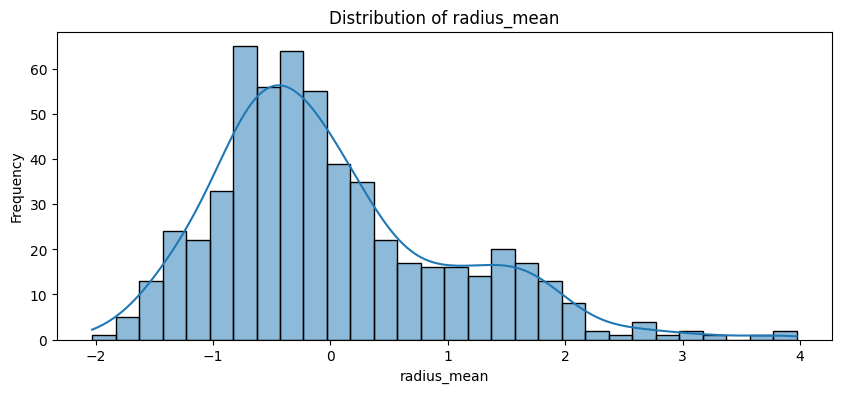

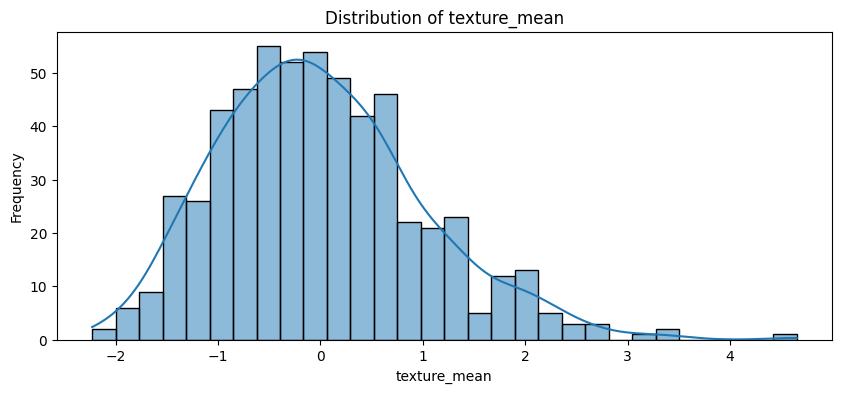

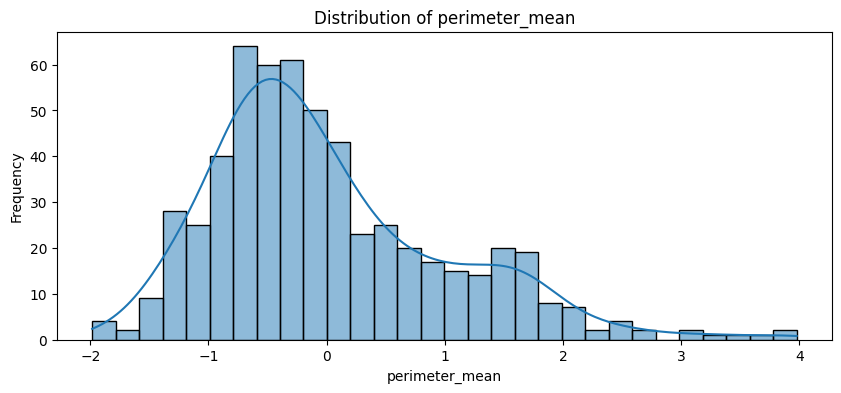

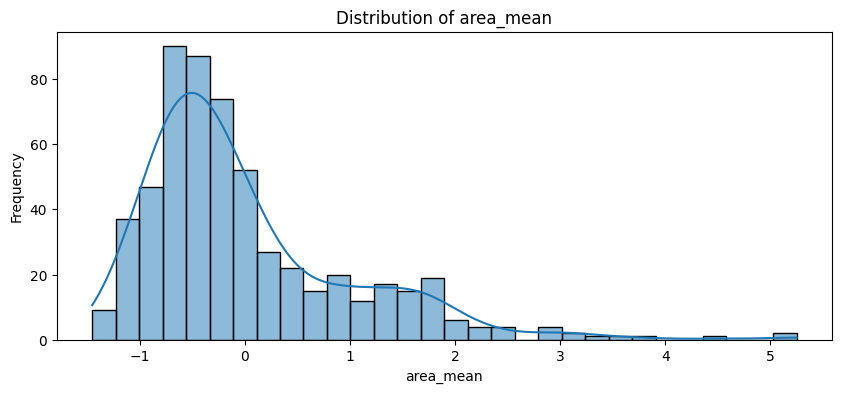

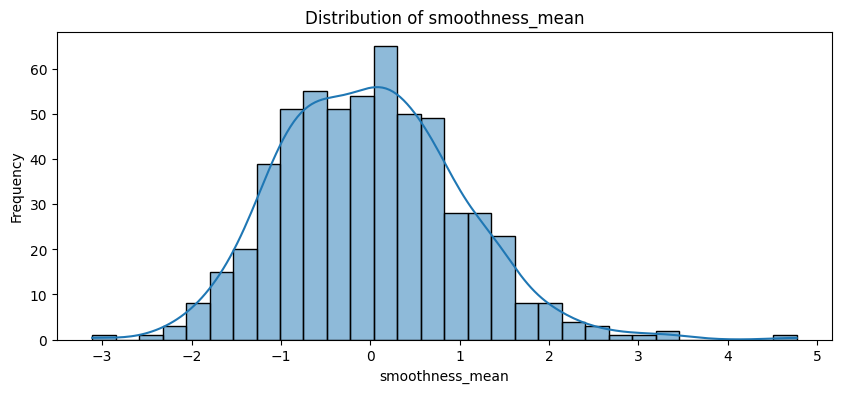

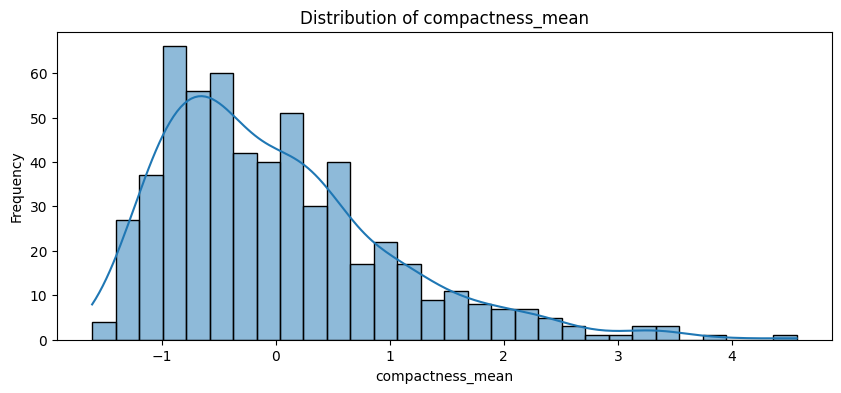

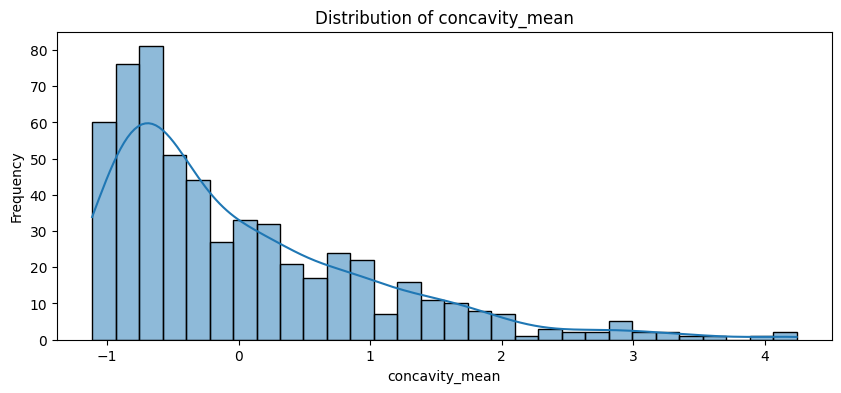

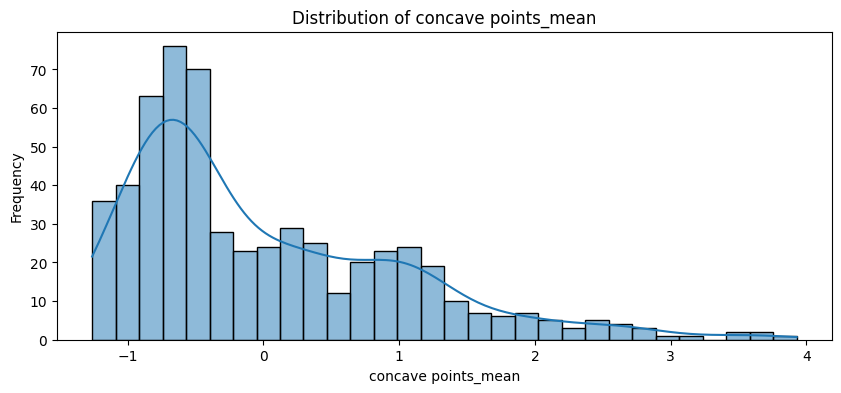

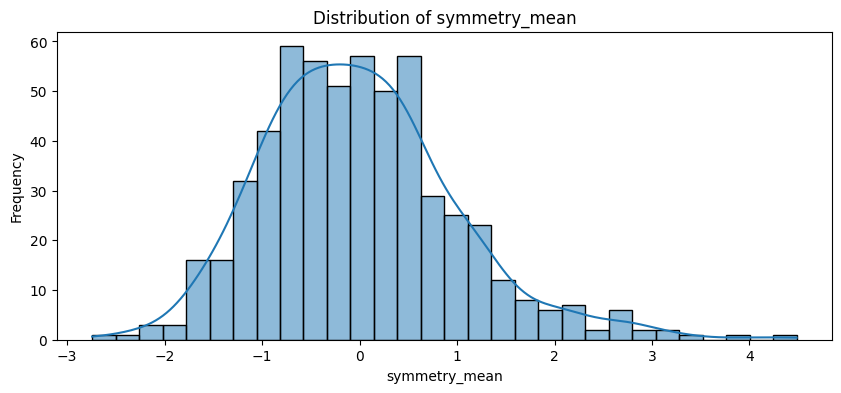

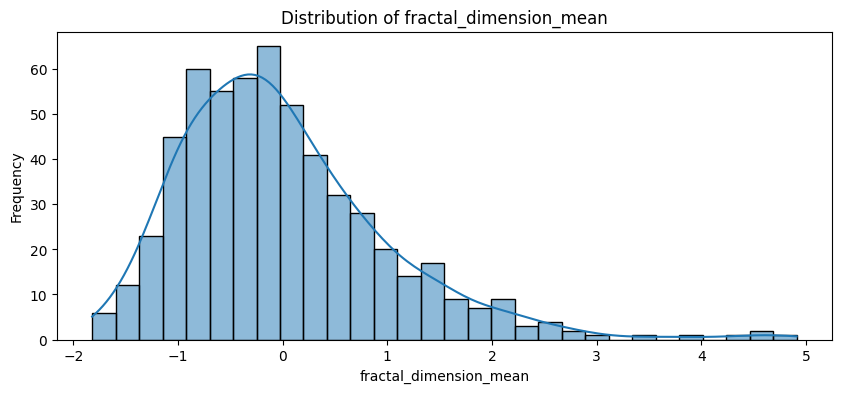

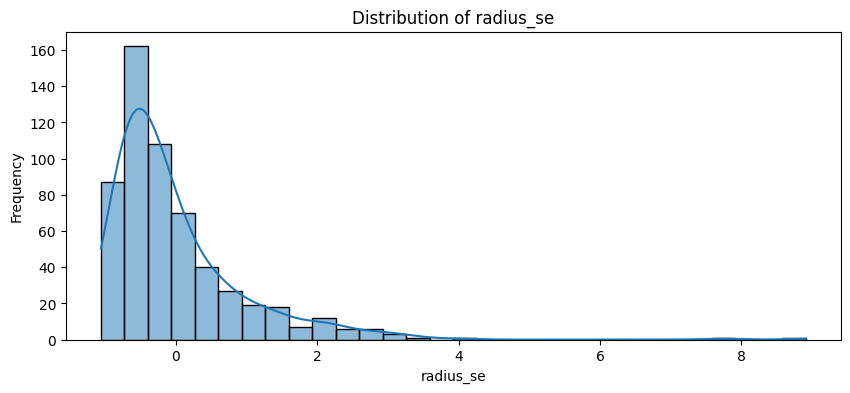

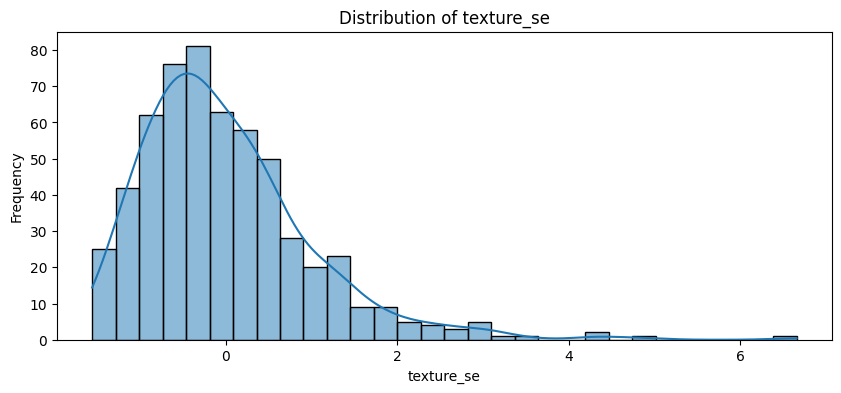

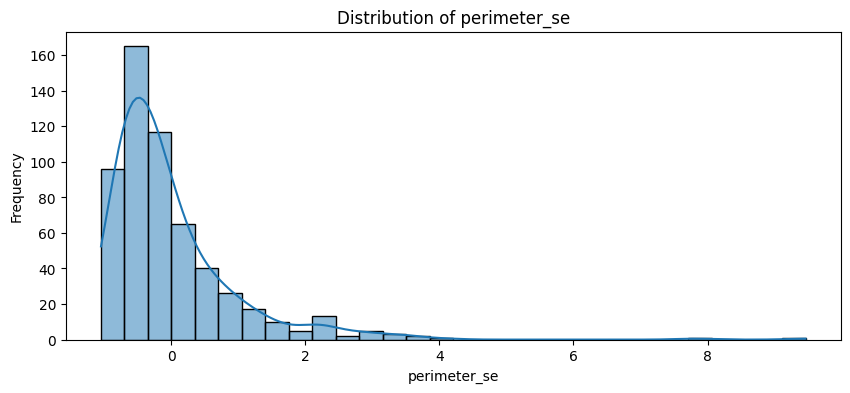

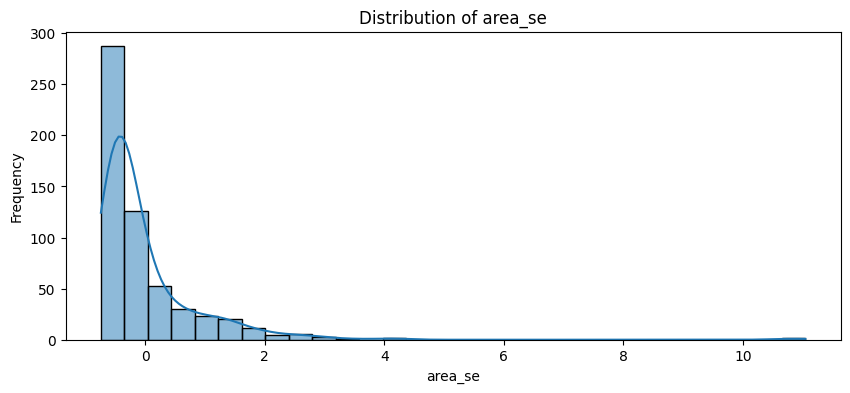

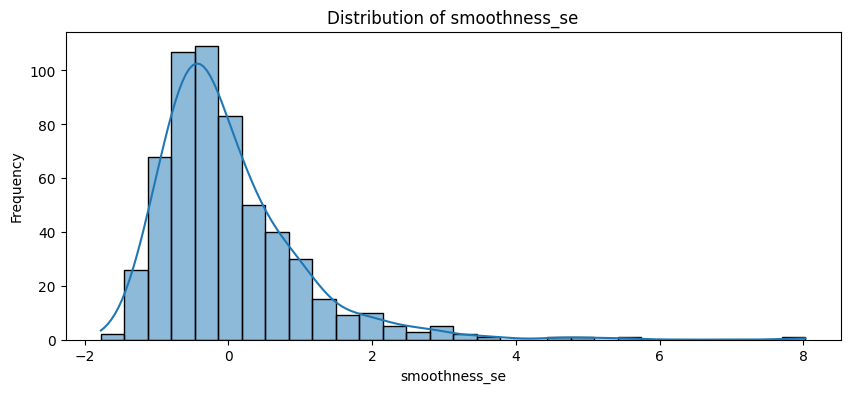

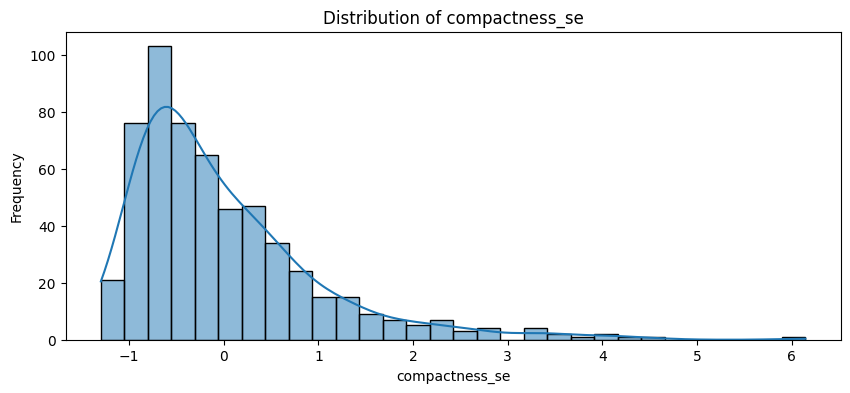

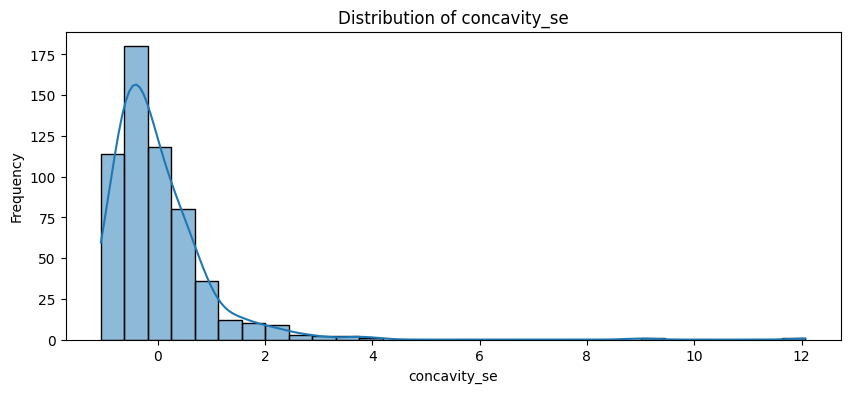

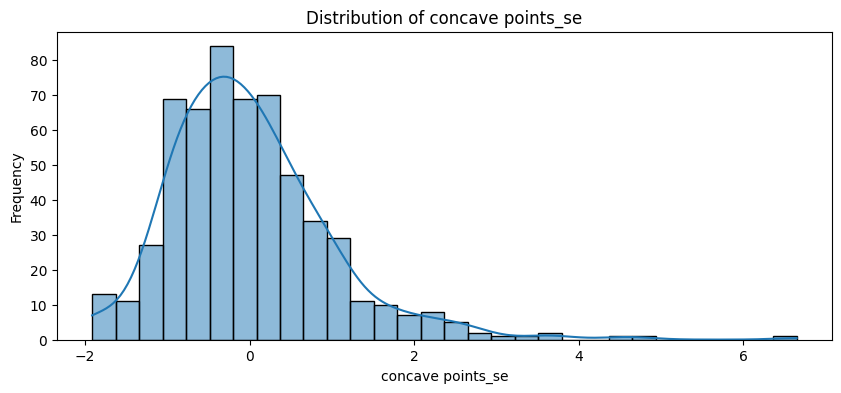

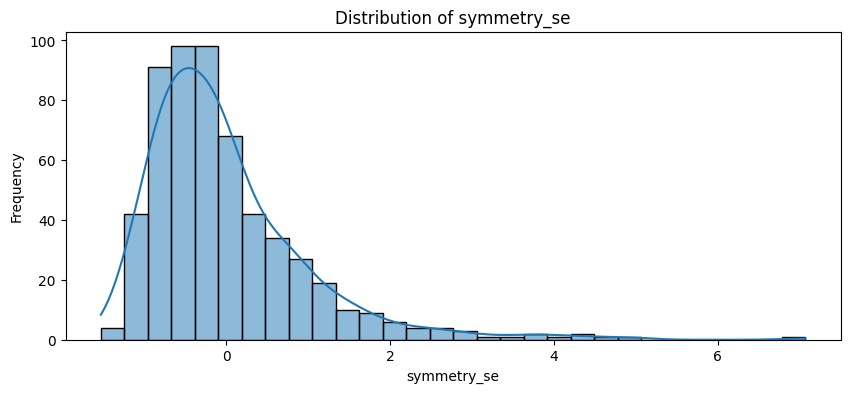

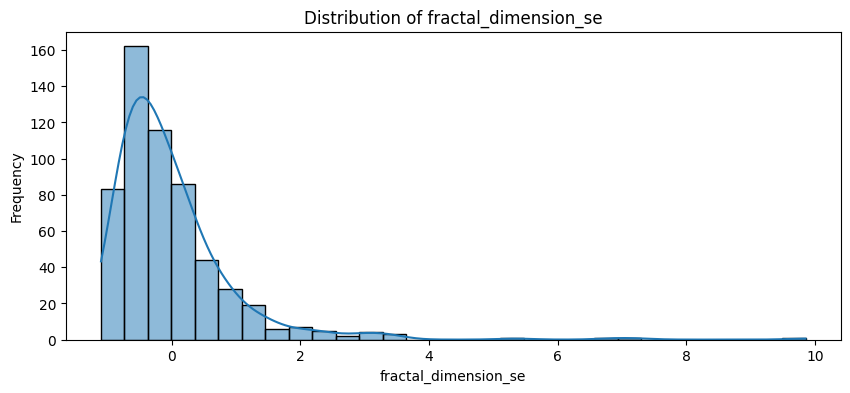

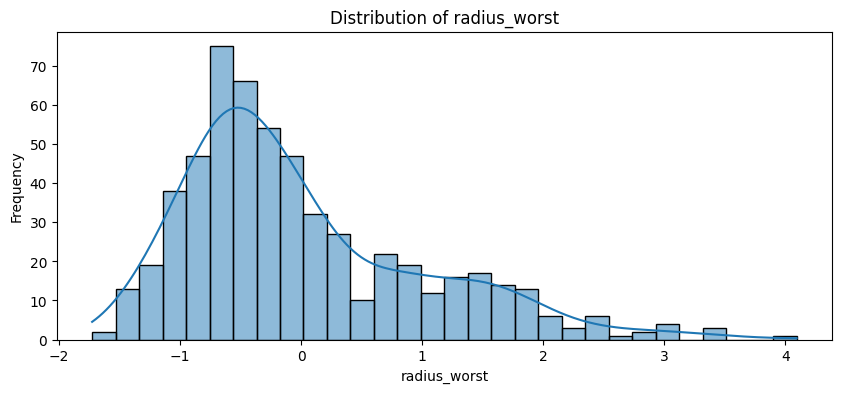

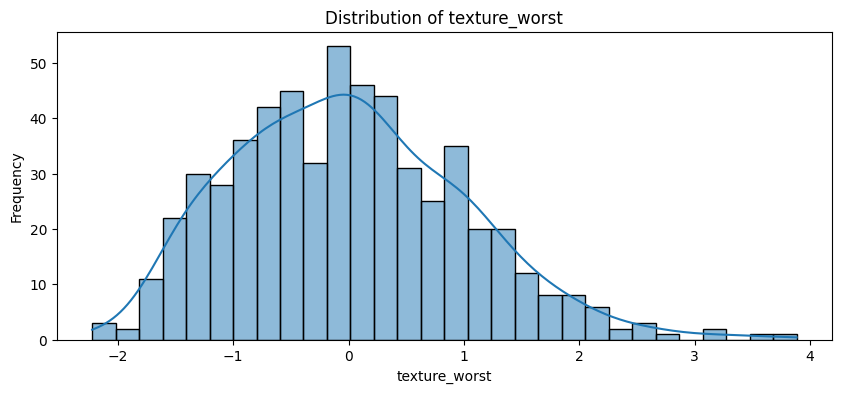

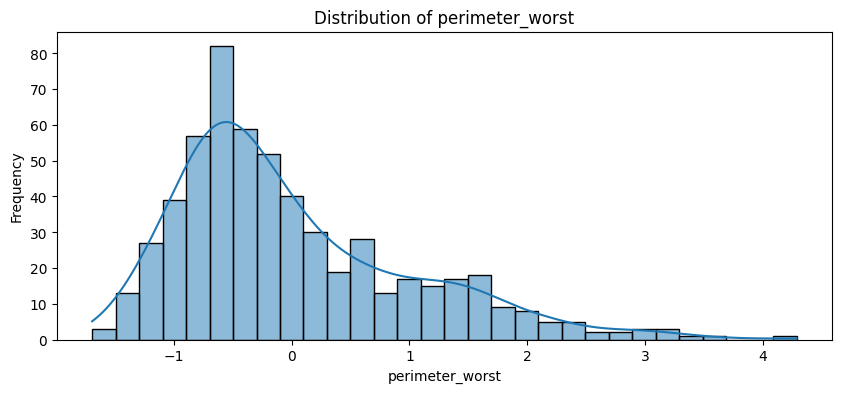

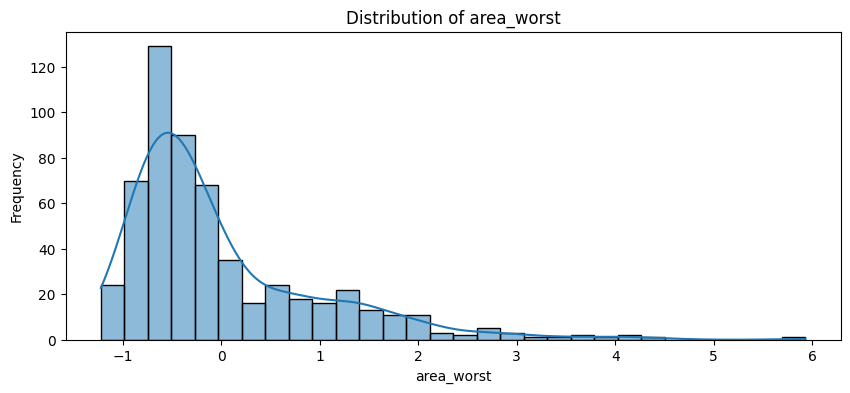

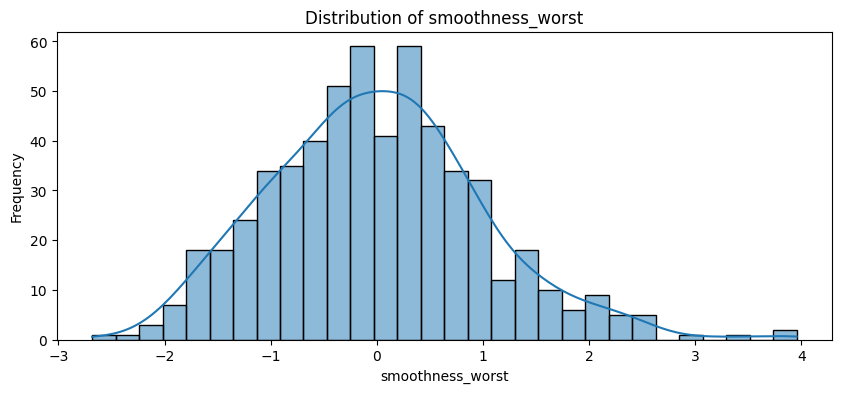

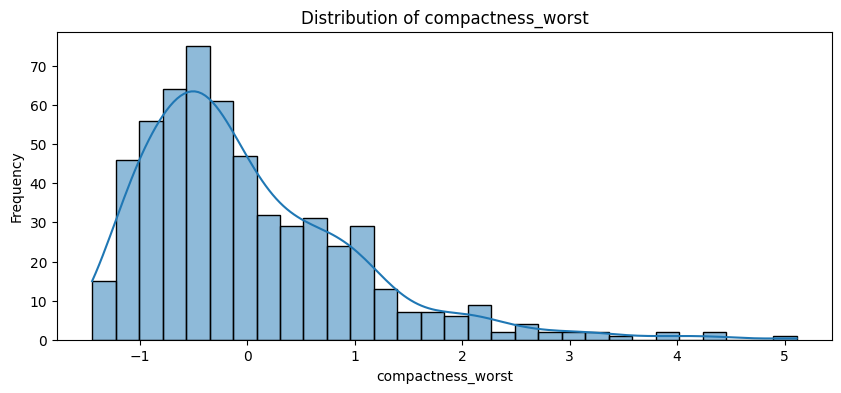

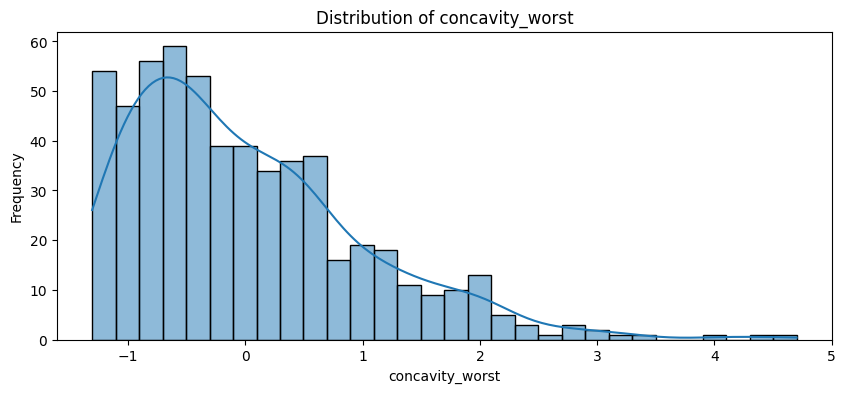

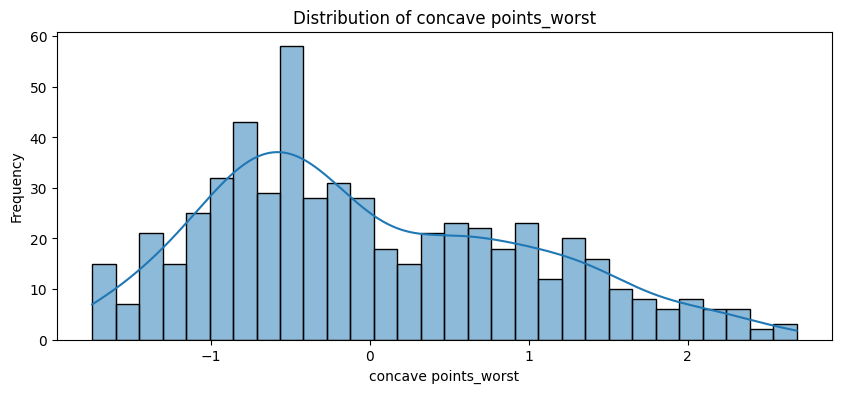

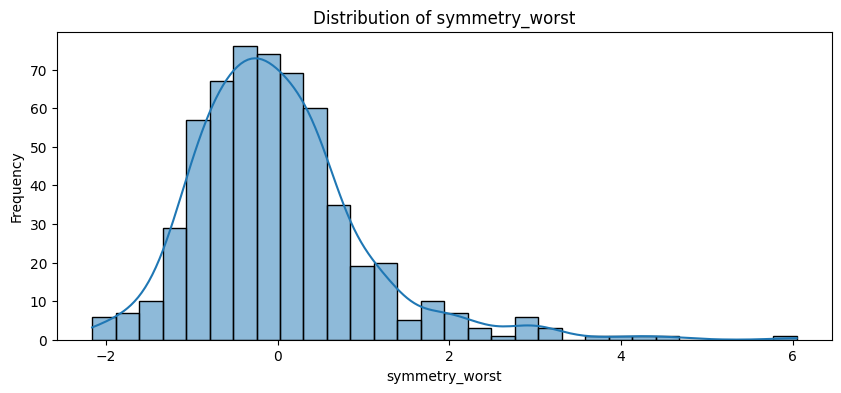

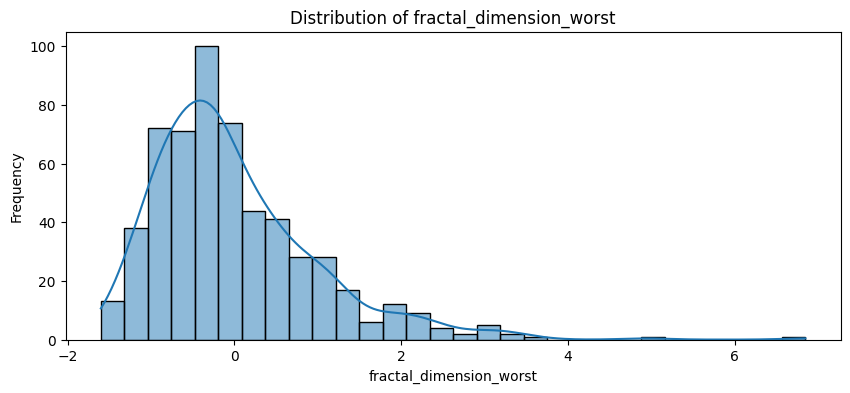

In [10]:
# Visualization of the distribution of features (Histograms for each feature)
for feature in features:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

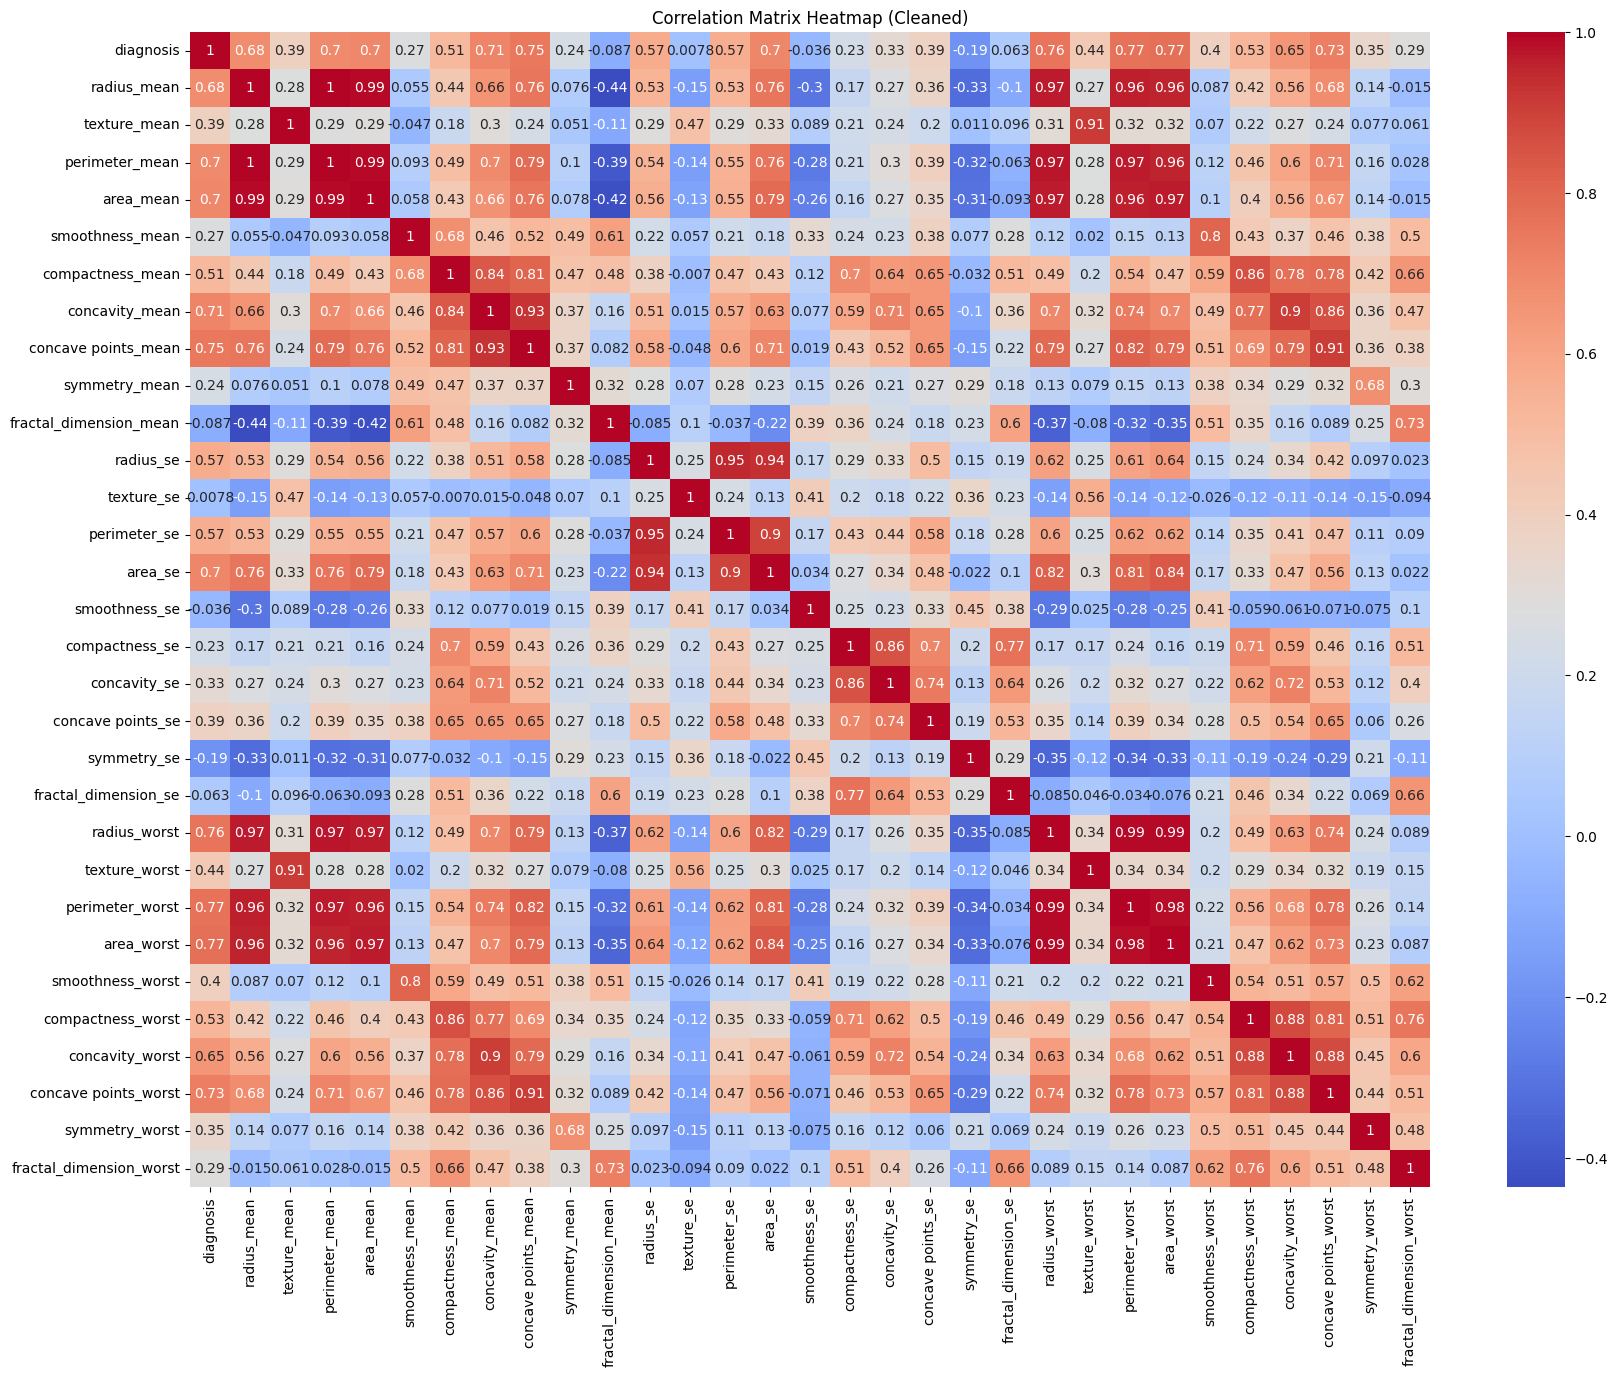

In [11]:
# Heatmap of the correlation matrix
plt.figure(figsize=(20, 15))
correlation_matrix_cleaned = df_cleaned.corr()
sns.heatmap(correlation_matrix_cleaned, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap (Cleaned)')
plt.show()

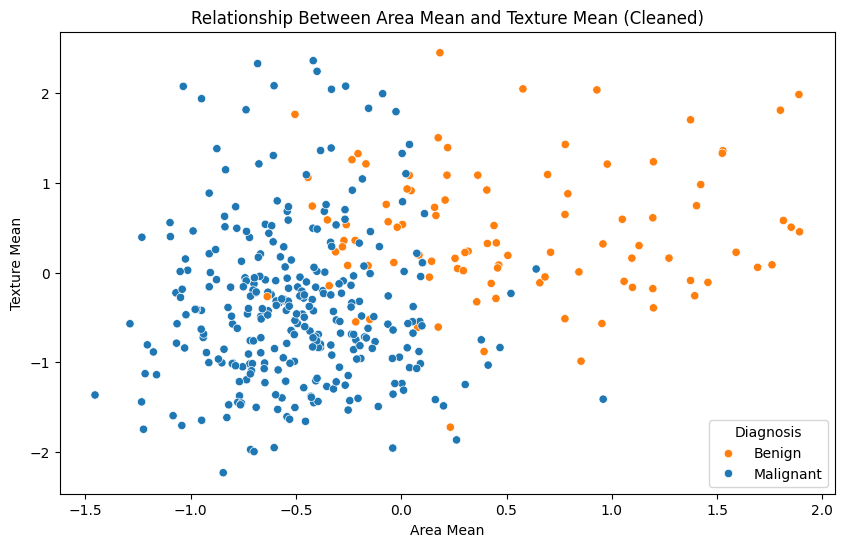

In [12]:
# Scatter plot to visualize relationships between two variables in the cleaned dataset
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x='area_mean', y='texture_mean', hue='diagnosis')
plt.title('Relationship Between Area Mean and Texture Mean (Cleaned)')
plt.xlabel('Area Mean')
plt.ylabel('Texture Mean')
plt.legend(title='Diagnosis', labels=['Benign', 'Malignant'])
plt.show()


# Phase 2

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.tree import plot_tree
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay

In [14]:
# split the dataset into training and testing and validate set
X = df_cleaned.drop('diagnosis', axis=1)
y = df_cleaned['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### K-mediods

In [15]:
def map_cluster_labels_to_class_labels(kmedoids, labels):
    """
    Map the cluster labels to actual class labels based on majority in the cluster.
    """
    cluster_labels = kmedoids.labels_
    unique_clusters = np.unique(cluster_labels)
    label_mapping = {}
    for cluster in unique_clusters:
        # Find the most common class label in each cluster
        mask = cluster_labels == cluster
        target_labels = labels[mask]
        most_common = np.bincount(target_labels).argmax()
        label_mapping[cluster] = most_common
    return label_mapping

def apply_mapping_and_evaluate(y_pred, mapping):
    """
    Apply the mapping to the predicted cluster labels to get the predicted class labels.
    """
    return np.array([mapping[cluster] for cluster in y_pred])

def kmediods_clustering_and_classification(X_train, X_test, y_train, y_test):

    # Initialize KMedoids
    kmedoids = KMedoids(n_clusters=2, random_state=42, metric='euclidean')
    kmedoids.fit(X_train)

    # Predicting the clusters
    y_train_pred_clusters = kmedoids.predict(X_train)
    y_test_pred_clusters = kmedoids.predict(X_test)

    # Mapping clusters to class labels based on training data
    cluster_to_class_labels = map_cluster_labels_to_class_labels(kmedoids, y_train)

    # Applying the cluster-to-class label mapping
    y_train_pred = apply_mapping_and_evaluate(y_train_pred_clusters, cluster_to_class_labels)
    y_test_pred = apply_mapping_and_evaluate(y_test_pred_clusters, cluster_to_class_labels)

    # Performance evaluation
    print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")
    print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred)}")
    print(f"Confusion Matrix on Test Data:\n{confusion_matrix(y_test, y_test_pred)}")
    
    

    return y_test_pred
    

In [16]:
results = kmediods_clustering_and_classification(X_train, X_test, y_train, y_test)

Train Accuracy: 0.7704402515723271
Test Accuracy: 0.6875
Confusion Matrix on Test Data:
[[55  0]
 [25  0]]


### Decision Tree

In [56]:
def train_decision_tree(X_train, X_test, y_train, y_test):
    # Define parameter grid for hyperparameter tuning
    param_grid = {
        'max_depth': [None, 5, 10, 15],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    # Initialize Decision Tree classifier
    clf = DecisionTreeClassifier(random_state=42, criterion='entropy')

    # Initialize GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

    # Perform hyperparameter tuning
    grid_search.fit(X_train, y_train)

    # Get the best parameters and best estimator
    best_params = grid_search.best_params_
    best_clf = grid_search.best_estimator_

    # Print best parameters
    print("Best Parameters:", best_params)

    # Predict on the test set
    y_pred = best_clf.predict(X_test)

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print performance metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)

    # Plot ROC curve
    y_pred_proba = best_clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    # Plot decision tree
    plt.figure(figsize=(15, 10))
    plot_tree(best_clf, filled=True, feature_names=X_train.columns, class_names=['Benign', 'Malignant'])
    plt.show()

    # Feature importance
    feature_importance = best_clf.feature_importances_
    sorted_indices = np.argsort(feature_importance)[::-1]
    sorted_features = X_train.columns[sorted_indices]
    sorted_importance = feature_importance[sorted_indices]

    plt.figure(figsize=(10, 8))
    sns.barplot(x=sorted_importance, y=sorted_features, palette='viridis')
    plt.xlabel('Feature Importance')
    plt.ylabel('Features')
    plt.title('Feature Importance Plot')
    plt.show()

    # Return best classifier
    return best_clf

Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Accuracy: 0.9
Precision: 0.9047619047619048
Recall: 0.76
F1 Score: 0.8260869565217391


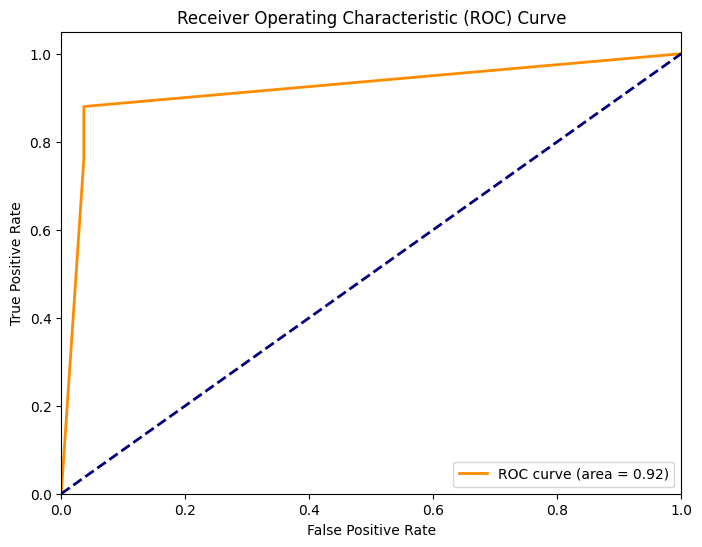

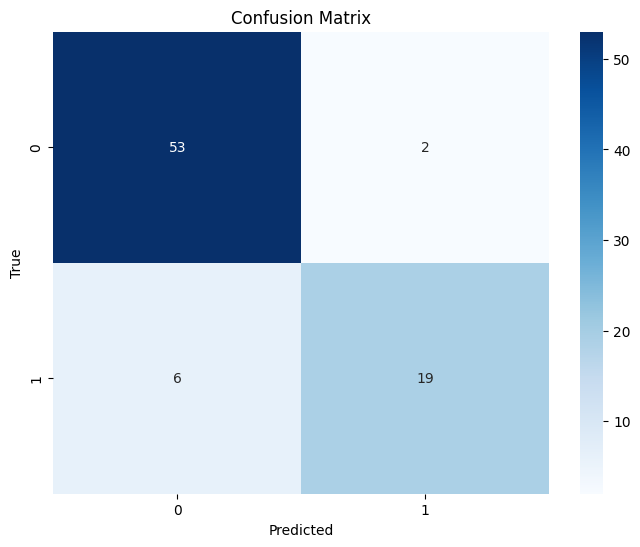

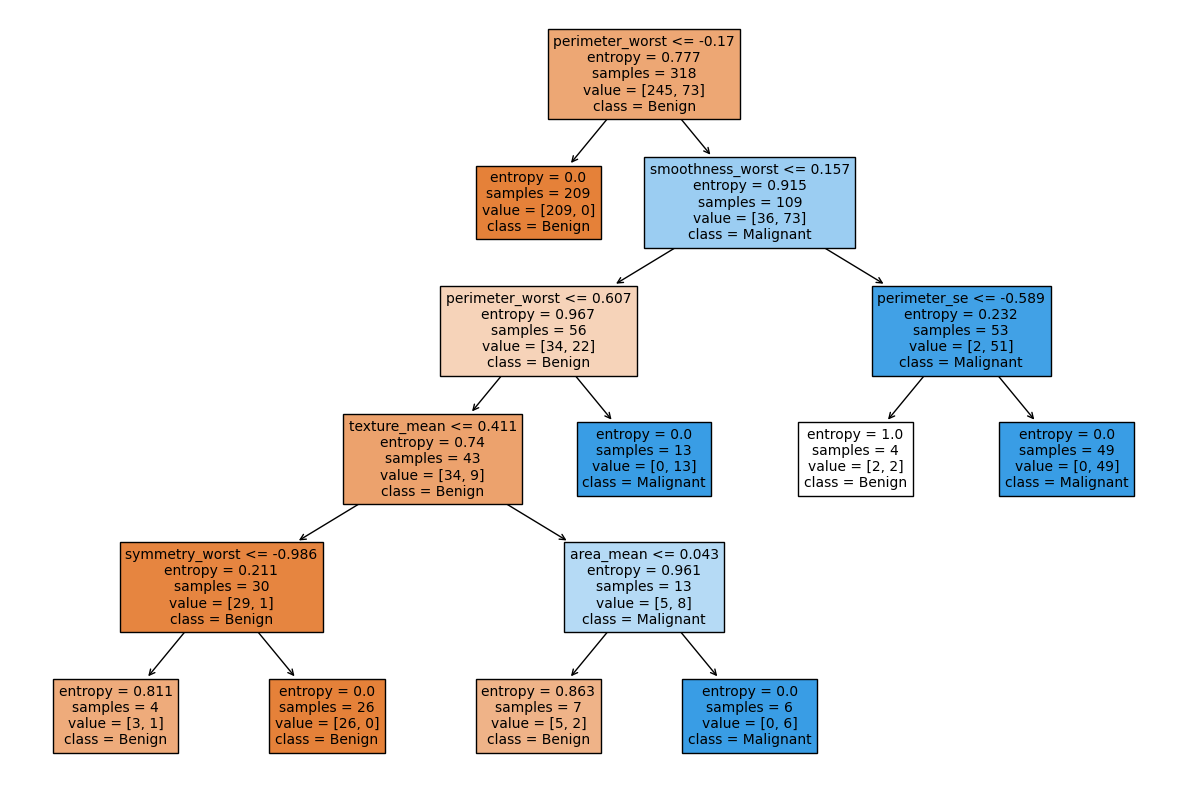

C:\Users\Yassin\AppData\Local\Temp\ipykernel_27328\1259193996.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_importance, y=sorted_features, palette='viridis')


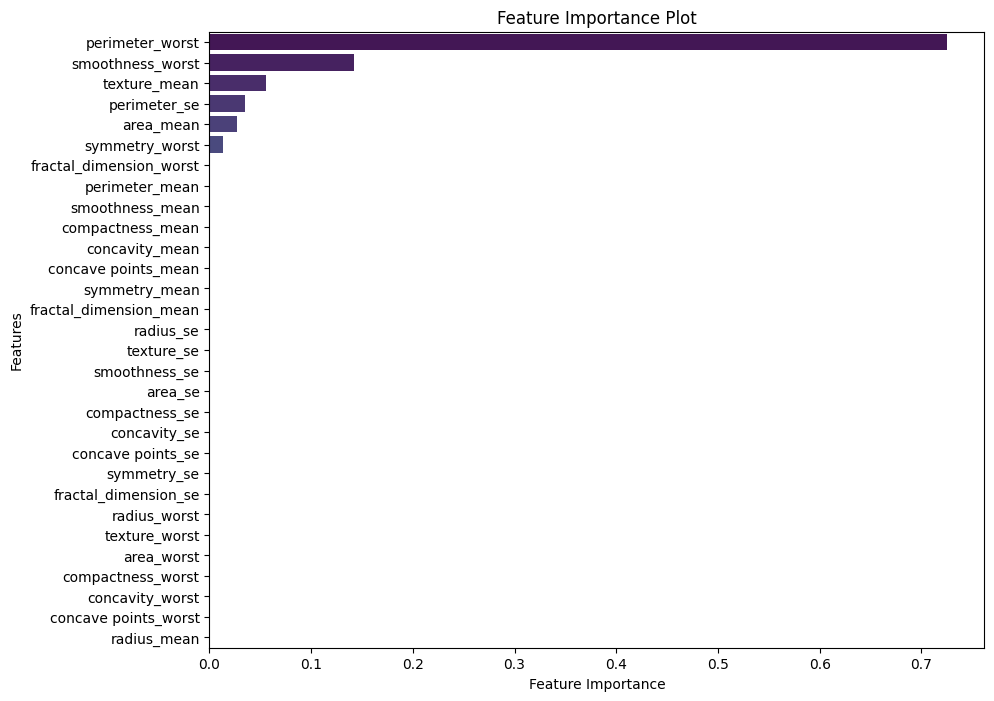

In [57]:
best_clf = train_decision_tree(X_train, X_test, y_train, y_test)

### K-Means

In [20]:
def kmeans(X_train, X_test, y_train, y_test, n_clusters=2):
    print("#---------------------------------------------kmeans----------------------------------------------")

    # Create a kmeans clustering model and fit on the training data
    kmeans = KMeans(n_clusters=n_clusters).fit(X_train)

    # Get labels for each point in training data
    y_predict = np.array(kmeans.labels_)

    # Flip the 0s to 1s and vice versa
    y_predict_flipped = np.where((y_predict==0)|(y_predict==1), y_predict^1, y_predict)

    # Test the model on the test data
    y_predict_test = KMeans.predict(kmeans, X_test)

    # Flip the 0s to 1s and vice versa
    y_predict_test_flipped = np.where((y_predict_test==0)|(y_predict_test==1), y_predict_test^1, y_predict_test)

    # Evaluate the performance of the model on both training and testing data
    train_acc = max(accuracy_score(y_train, y_predict), accuracy_score(y_train, y_predict_flipped))
    test_acc = max(accuracy_score(y_test, y_predict_test),accuracy_score(y_test, y_predict_test_flipped))

    print("Training data labels: ")
    print(kmeans.labels_)
    print("---------------------------------------------------------------------")
    print("Cluster Centers")
    print(kmeans.cluster_centers_)
    print("---------------------------------------------------------------------")
    print("Training Accuracy: ", "{:.4f}".format(train_acc*100), "%")
    print("Testing Accuracy: ", "{:.4f}".format(test_acc*100), "%")

    # Reduce training data to 2 features using pca to plot results
    pca = PCA(n_components=2)

    X_train_plt = pca.fit_transform(X_train)

    kmeans_plt = KMeans(n_clusters=n_clusters).fit(X_train_plt)

    # Generate a scatter plot graph for 2 clusters and their centers
    
    plt.scatter(X_train_plt[:, 0][kmeans_plt.labels_ == 0], X_train_plt[:, 1][kmeans_plt.labels_ == 0], s=3, c='r')
    plt.scatter(X_train_plt[:, 0][kmeans_plt.labels_ == 1], X_train_plt[:, 1][kmeans_plt.labels_ == 1], s=3, c='b')
    plt.plot(kmeans_plt.cluster_centers_[0][0], kmeans_plt.cluster_centers_[0][1], marker="x", markersize=10, markeredgecolor="black")
    plt.plot(kmeans_plt.cluster_centers_[1][0], kmeans_plt.cluster_centers_[1][1], marker="x", markersize=10, markeredgecolor="black")

    plt.show()

    # Convert class labels from integer to string format
    y_true_str = ["Benign" if label == 0 else "Malignant" for label in y_test]
    if accuracy_score(y_test, y_predict_test) > accuracy_score(y_test, y_predict_test_flipped):
        y_pred_str = ["Benign" if label == 0 else "Malignant" for label in y_predict_test]
    else:
        y_pred_str = ["Benign" if label == 0 else "Malignant" for label in y_predict_test_flipped]

    # Generate a confusion matrix plot
    cm = confusion_matrix(y_true_str, y_pred_str, labels=["Benign", "Malignant"])
    cm_labels = {"Benign": "Benign", "Malignant": "Malignant"}
    fig, ax = plt.subplots(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=cm_labels.values(), yticklabels=cm_labels.values(),
                cbar=False, annot_kws={"fontsize": 12}, linewidths=.5, linecolor='lightgray')
    cbar = ax.figure.colorbar(ax.collections[0])
    cbar.ax.tick_params(labelsize=12)
    plt.title('Confusion Matrix', fontsize=14)
    plt.xlabel('Predicted label', fontsize=12)
    plt.ylabel('True label', fontsize=12)
    plt.tight_layout()
    plt.show()

#---------------------------------------------kmeans----------------------------------------------


c:\users\yassin\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training data labels: 
[0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1
 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0
 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 0 0 1 1 1 0 0 1
 1 0 1 1 0 1 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 0
 1 1 1 1 0 1 1 1 0 1 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1
 1 1 1 0 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0 0 0
 1 0 1 1 1 1 1 0 0 0 0 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 1 0 1 0 1 1
 0 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1]
---------------------------------------------------------------------
Cluster Centers
[[ 0.48446472  0.20920051  0.48709521  0.38310899  0.27402355  0.41313437
   0.37801024  0.48079548  0.05109498 -0.11880435 -0.04517833 -0.3843791
  -0.0199093  -0.01303925 -0.27325405  0.10779364  0.11085107  0.19362293
  -0.39989243 -0.1189150

c:\users\yassin\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


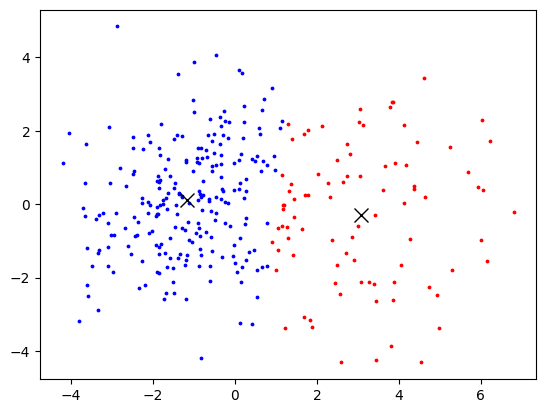

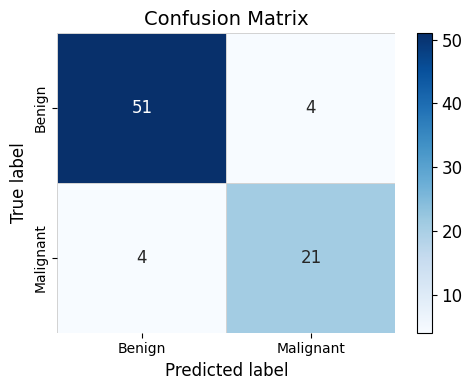

In [21]:
kmeans(X_train, X_test, y_train, y_test)

### KNN Classifier

In [48]:
def knn(X_train, X_test, y_train, y_test):
    # Define parameter grid for hyperparameter tuning
    param_grid = {
        'n_neighbors': [3, 5, 7, 9, 11],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
        'p': [1, 2],
        'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
    }

    # Initialize KNN classifier
    knn = KNeighborsClassifier()

    # Initialize GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

    # Perform hyperparameter tuning
    grid_search.fit(X_train, y_train)

    # Get the best parameters and best estimator
    best_params = grid_search.best_params_
    best_knn = grid_search.best_estimator_

    # Print best parameters
    print("Best Parameters:", best_params)

    # Predict on the test set
    y_pred = best_knn.predict(X_test)

    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    tick_marks = np.arange(len(np.unique(y_test)))
    plt.xticks(tick_marks, ['B', 'M'])
    plt.yticks(tick_marks, ['B', 'M'])

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], fmt),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.show()

    # Calculate ROC/AUC
    y_scores = best_knn.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()

    # Plot learning curve
    train_sizes, train_scores, test_scores = learning_curve(best_knn, X_train, y_train, cv=5, scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.title("Learning Curve")
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()

    

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print performance metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)

    

    # Return best classifier
    return best_knn, roc_auc

Best Parameters: {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}


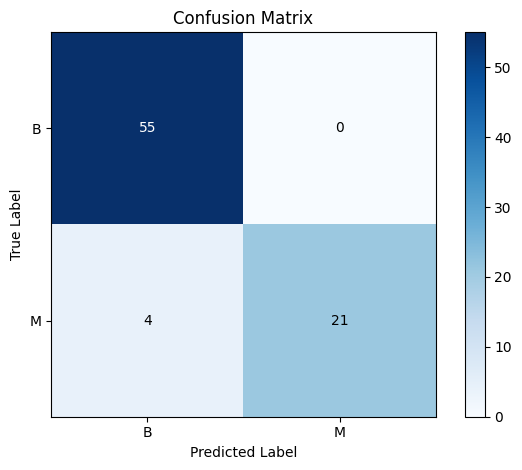

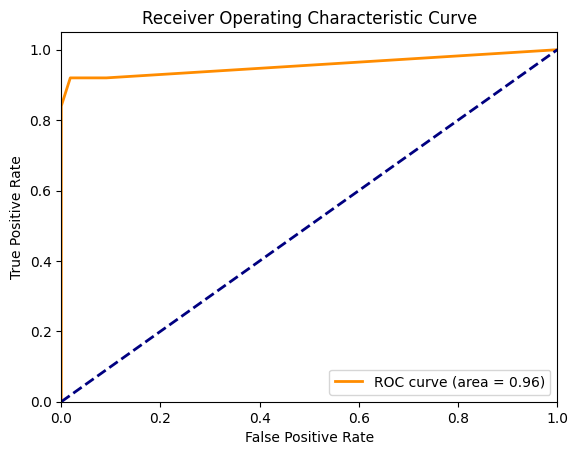

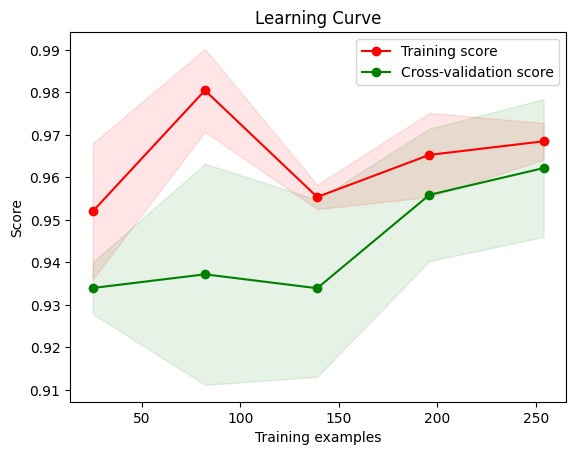

Accuracy: 0.95
Precision: 1.0
Recall: 0.84
F1 Score: 0.9130434782608696


In [49]:
knn_classifier = knn(X_train, X_test, y_train, y_test)

### Naive Bayes

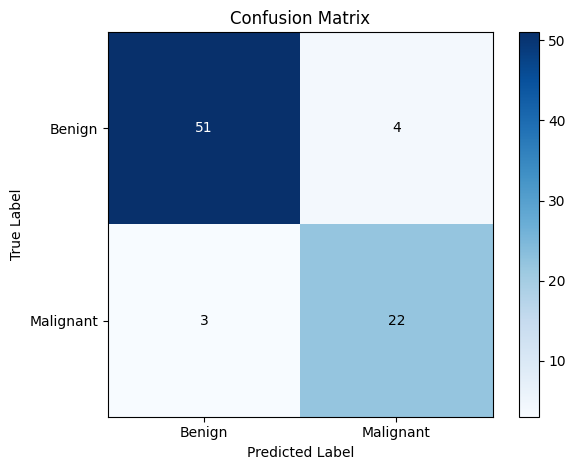

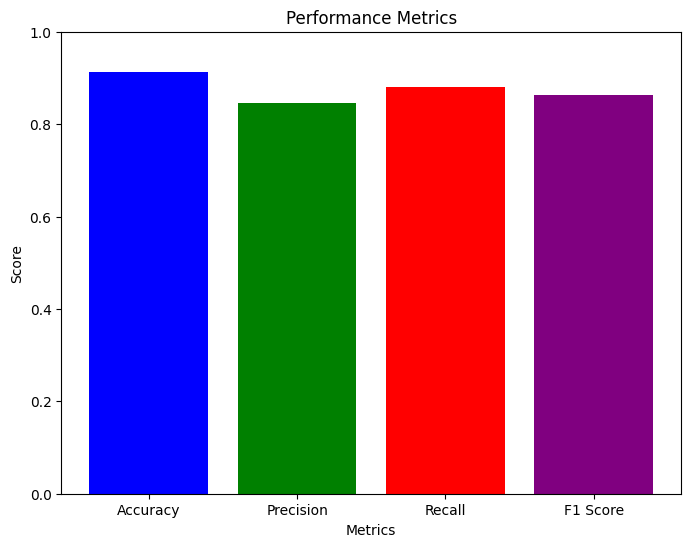

Accuracy: 0.9125
Precision: 0.8461538461538461
Recall: 0.88
F1 Score: 0.8627450980392156


In [55]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def train_naive_bayes(X_train, X_test, y_train, y_test):
   

    # Initialize Gaussian Naive Bayes classifier
    nb_classifier = GaussianNB()

    # Train the classifier
    nb_classifier.fit(X_train, y_train)

    # Predict on the test set
    y_pred = nb_classifier.predict(X_test)

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

     # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    tick_marks = np.arange(len(np.unique(y_test)))
    plt.xticks(tick_marks, ['Benign', 'Malignant'])
    plt.yticks(tick_marks, ['Benign', 'Malignant'])

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], fmt),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.show()

    labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
    values = [accuracy, precision, recall, f1]

    plt.figure(figsize=(8, 6))
    plt.bar(labels, values, color=['blue', 'green', 'red', 'purple'])
    plt.title('Performance Metrics')
    plt.xlabel('Metrics')
    plt.ylabel('Score')
    plt.ylim(0, 1)  # Set y-axis limit from 0 to 1
    plt.show()
    # Print performance metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    

    # Return trained classifier
    return nb_classifier

# X = df_cleaned.drop('diagnosis', axis=1)
# y = df_cleaned['diagnosis']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
nb_classifier = train_naive_bayes(X_train, X_test, y_train, y_test)


### SVM

Best Parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Accuracy: 0.9625
Precision: 1.0
Recall: 0.88
F1 Score: 0.9361702127659575


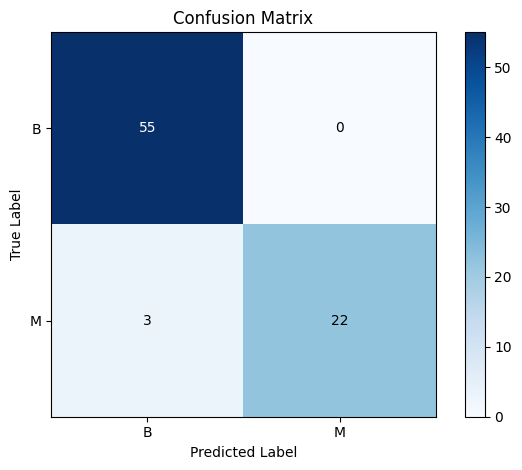

In [26]:
from sklearn.svm import SVC


def svm(X_train, X_test, y_train, y_test):
    # Define parameter grid for hyperparameter tuning
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'gamma': [1, 0.1, 0.01, 0.001],
        'kernel': ['rbf', 'linear', 'poly', 'sigmoid']
    }

    # Initialize SVM classifier
    svm_classifier = SVC()

    # Initialize GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(svm_classifier, param_grid, cv=5, scoring='accuracy')

    # Perform hyperparameter tuning
    grid_search.fit(X_train, y_train)

    # Get the best parameters and best estimator
    best_params = grid_search.best_params_
    best_svm = grid_search.best_estimator_

    # Print best parameters
    print("Best Parameters:", best_params)

    # Predict on the test set
    y_pred = best_svm.predict(X_test)

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print performance metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    
       # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    tick_marks = np.arange(len(np.unique(y_test)))
    plt.xticks(tick_marks, ['B', 'M'])
    plt.yticks(tick_marks, ['B', 'M'])

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
        
    plt.tight_layout()
    plt.show()
    # Return best classifier
    return best_svm

svm_classifier = svm(X_train, X_test, y_train, y_test)









### Logistic Regression

Accuracy: 0.95
Precision: 0.9565217391304348
Recall: 0.88
F1 Score: 0.9166666666666666


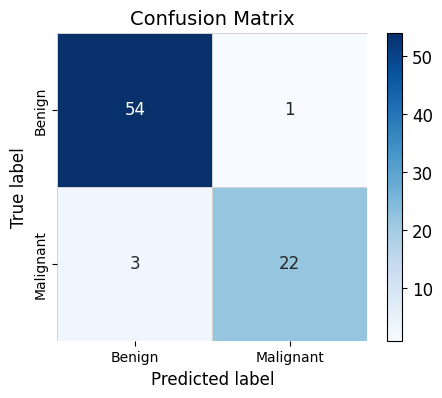

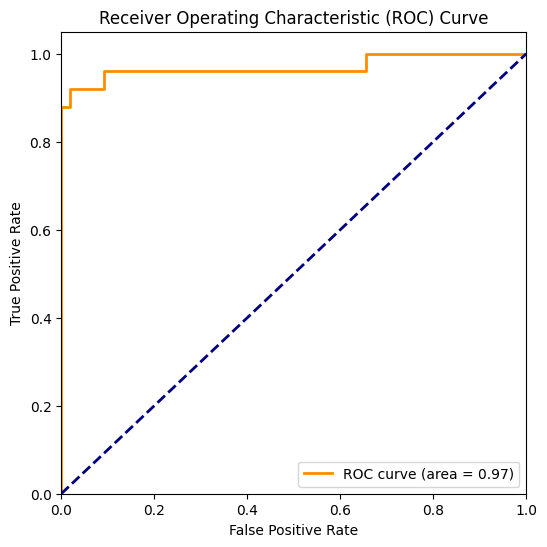

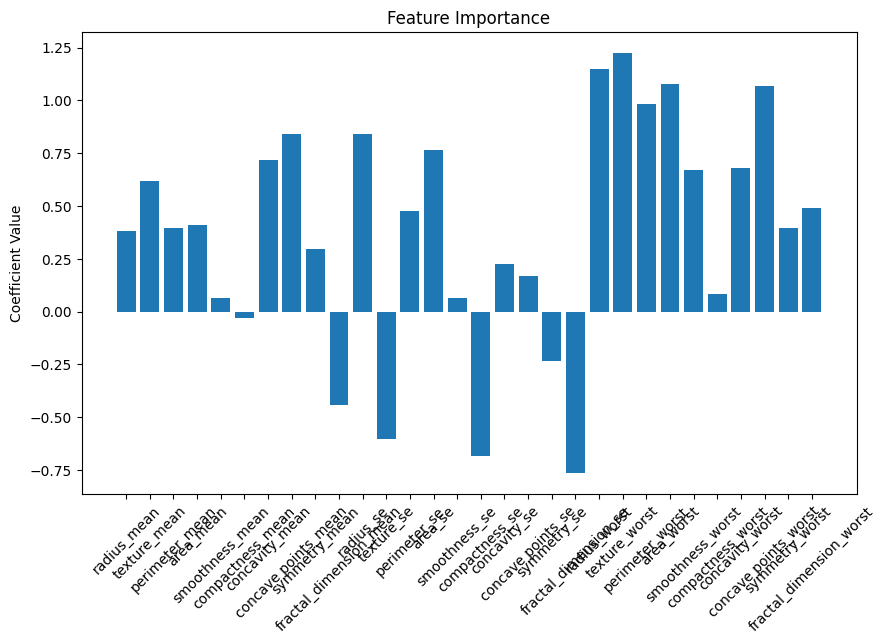

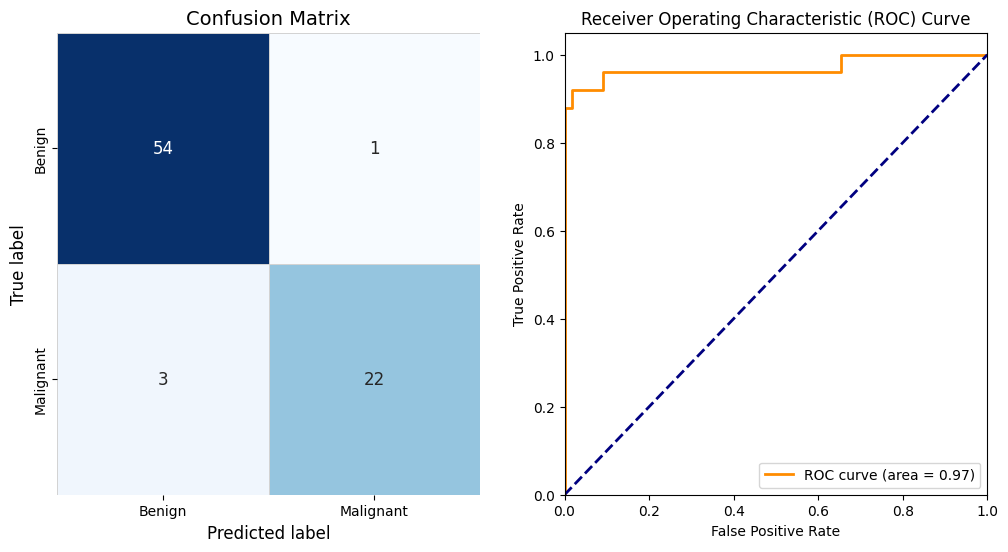

LogisticRegression(max_iter=10000, random_state=0)

In [27]:
#logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

# Function to train a logistic regression classifier
def logistic_regression(X_train, X_test, y_train, y_test):
    # Create a logistic regression classifier
    model = LogisticRegression(random_state=0,max_iter=10000)

    # Train the classifier on the training data
    model.fit(X_train, y_train)

    # Test the classifier on the test data
    y_pred = model.predict(X_test)

    # Convert class labels from integer to string format
    y_true_str = ["Benign" if label == 0 else "Malignant" for label in y_test]
    y_pred_str = ["Benign" if label == 0 else "Malignant" for label in y_pred]


    # Evaluate the performance of the classifier
    print("Accuracy:", accuracy_score(y_true_str, y_pred_str))
    print("Precision:", precision_score(y_true_str, y_pred_str, pos_label="Malignant"))
    print("Recall:", recall_score(y_true_str, y_pred_str, pos_label="Malignant"))
    print("F1 Score:", f1_score(y_true_str, y_pred_str, pos_label="Malignant"))


    # Generate a confusion matrix plot
    cm = confusion_matrix(y_true_str, y_pred_str, labels=["Benign", "Malignant"])
    cm_labels = {"Benign": "Benign", "Malignant": "Malignant"}
    fig, ax = plt.subplots(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=cm_labels.values(), yticklabels=cm_labels.values(),
                cbar=False, annot_kws={"fontsize": 12}, linewidths=.5, linecolor='lightgray')
    cbar = ax.figure.colorbar(ax.collections[0])
    cbar.ax.tick_params(labelsize=12)
    plt.title('Confusion Matrix', fontsize=14)
    plt.xlabel('Predicted label', fontsize=12)
    plt.ylabel('True label', fontsize=12)

    # Generate an ROC curve plot
    y_scores = model.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    fig2, ax2 = plt.subplots(figsize=(6, 6))
    ax2.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    ax2.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax2.set_xlim([0.0, 1.0])
    ax2.set_ylim([0.0, 1.05])
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.set_title('Receiver Operating Characteristic (ROC) Curve')
    ax2.legend(loc="lower right")


    # Generate a feature importance plot (for models with coefficients available)
    if hasattr(model, 'coef_'):
        coefs = model.coef_.ravel()
        if len(coefs) == 5:
            names = ['symmetry_se', 'smoothness_mean', 'texture_se', 'symmetry_worst', 'compactness_se']
        else:
            names = X_train.columns
        plt.figure(figsize=(10, 6))
        plt.bar(names, coefs)
        plt.title('Feature Importance')
        plt.ylabel('Coefficient Value')
        plt.xticks(rotation=45)
        plt.show()

    # Show all plots
    fig2, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=cm_labels.values(), yticklabels=cm_labels.values(),
                cbar=False, annot_kws={"fontsize": 12}, linewidths=.5, linecolor='lightgray', ax=ax1)
    ax1.set_title('Confusion Matrix', fontsize=14)
    ax1.set_xlabel('Predicted label', fontsize=12)
    ax1.set_ylabel('True label', fontsize=12)
    ax2.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    ax2.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax2.set_xlim([0.0, 1.0])
    ax2.set_ylim([0.0, 1.05])
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.set_title('Receiver Operating Characteristic (ROC) Curve')
    ax2.legend(loc="lower right")
    plt.show()

    # Return the trained model
    return model

# Train a logistic regression classifier
logistic_regression(X_train, X_test, y_train, y_test)


### Ramdom Forest

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy: 0.925
Precision: 1.0
Recall: 0.76
F1 Score: 0.8636363636363636


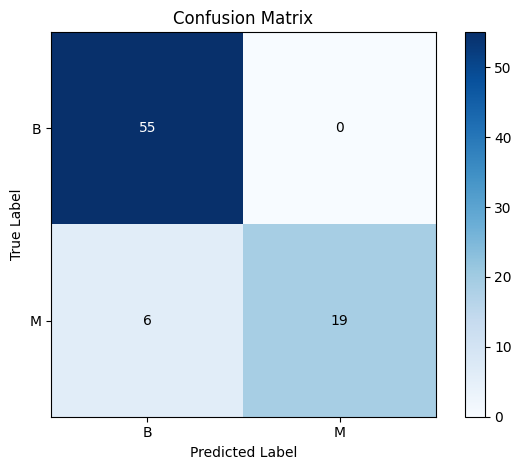

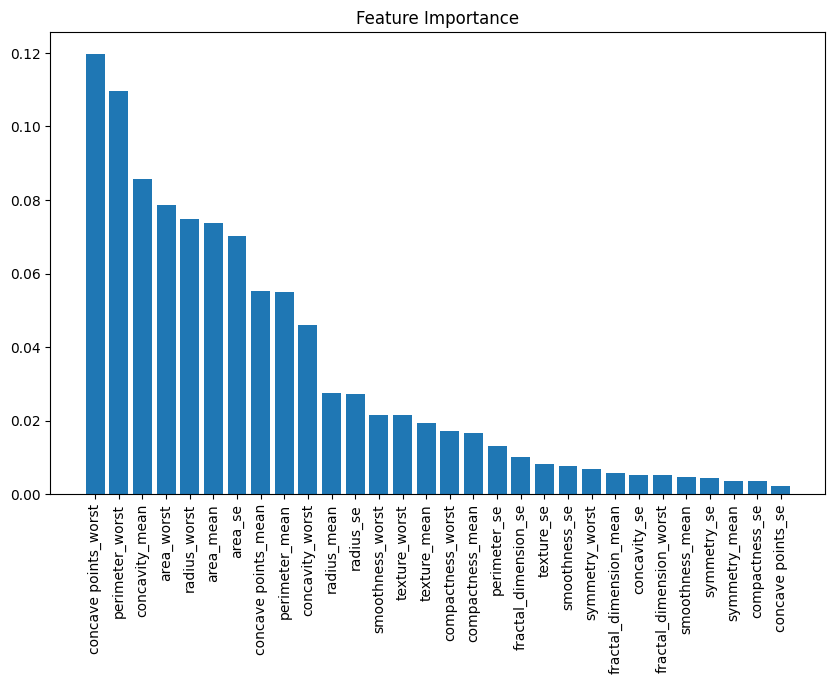

RandomForestClassifier(max_depth=5, n_estimators=50, random_state=42)

In [28]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

def random_forest(X_train, X_test, y_train, y_test):
    # Define parameter grid for hyperparameter tuning
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [5, 10, 15, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    # Initialize Random Forest classifier
    rf = RandomForestClassifier(random_state=42)

    # Initialize GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')

    # Perform hyperparameter tuning
    grid_search.fit(X_train, y_train)

    # Get the best parameters and best estimator
    best_params = grid_search.best_params_
    best_rf = grid_search.best_estimator_

    # Print best parameters
    print("Best Parameters:", best_params)

    # Predict on the test set
    y_pred = best_rf.predict(X_test)

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print performance metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)

    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    tick_marks = np.arange(len(np.unique(y_test)))
    plt.xticks(tick_marks, ['B', 'M'])
    plt.yticks(tick_marks, ['B', 'M'])

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
        
    plt.tight_layout()
    plt.show()

    #plot feature importance
    importances = best_rf.feature_importances_
    indices = np.argsort(importances)[::-1]
    plt.figure(figsize=(10, 6))
    plt.bar(range(X_train.shape[1]), importances[indices])
    plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
    plt.title("Feature Importance")
    plt.show()


    # Return best classifier
    return best_rf

random_forest(X_train, X_test, y_train, y_test)

### Linear Regression

inspect the intercept : 0.49447507719871964
retrieving the slope : [-3.28766283 -0.0271521   2.38991515  0.62070016  0.04698709 -0.20155974
  0.15106169  0.03227358  0.04622824 -0.06407536 -0.30518656 -0.06933725
 -0.15752354  0.79934726  0.08240475 -0.07671664  0.03677603  0.02095874
  0.12663378 -0.15252797  0.90279887  0.12474874  0.16565003 -0.45245011
 -0.08665577  0.06035693 -0.12339242  0.10623046 -0.09684337  0.22916843]
regression score : 0.6542417825665034
Mean absolute error: 0.0750
Mean squared error: 0.0750
Root mean squared error: 0.2739
Accuracy: 92.5


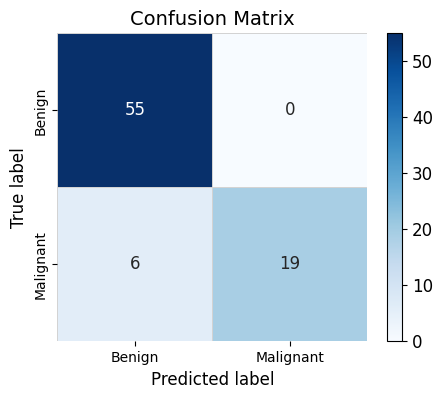

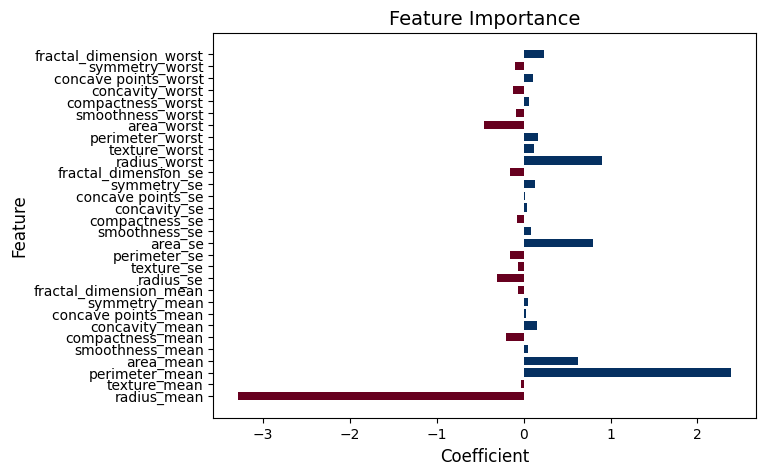

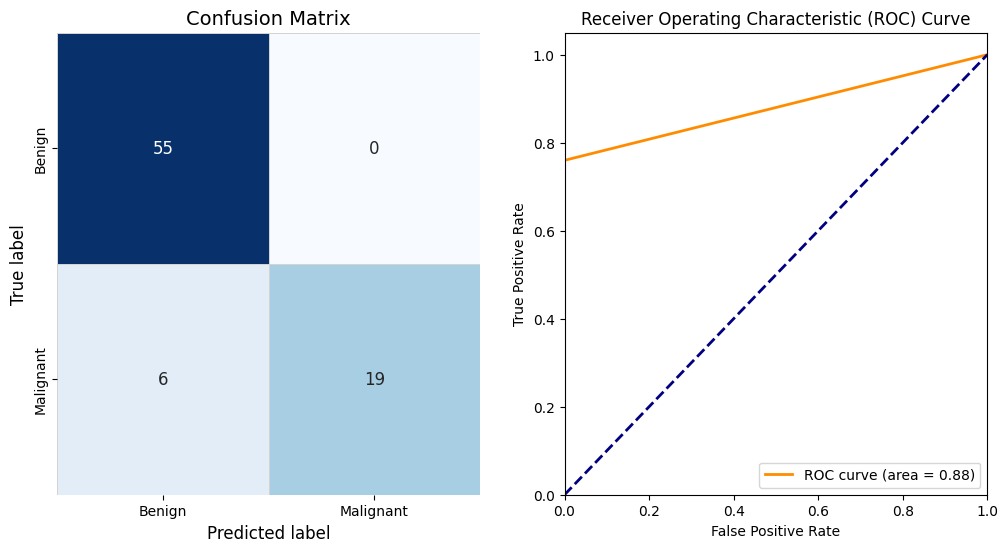

LinearRegression()

In [29]:
#linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

def linear_regression(X_train, X_test, y_train, y_test):
    regr = LinearRegression()
    regr.fit(X_train, y_train)
    #print(X_train.shape)
    intr = regr.intercept_
    print(f'inspect the intercept : {intr}')
    slope = regr.coef_
    print(f'retrieving the slope : {slope}')
    print(f'regression score : {regr.score(X_test, y_test)}')

    y_pred = regr.predict(X_test)

    y_pred = np.where(y_pred > 0.5, 1, 0)

    y_pred_flipped = np.where((y_pred == 0) | (y_pred == 1), y_pred ^ 1, y_pred)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print(f'Mean absolute error: {mae:.4f}')
    print(f'Mean squared error: {mse:.4f}')
    print(f'Root mean squared error: {rmse:.4f}')

    # Convert class labels from integer to string format
    y_true_str = ["Benign" if label == 0 else "Malignant" for label in y_test]
    if accuracy_score(y_test, y_pred) > accuracy_score(y_test, y_pred_flipped):
        y_pred_str = ["Benign" if label == 0 else "Malignant" for label in y_pred]
    else:
        y_pred_str = ["Benign" if label == 0 else "Malignant" for label in y_pred_flipped]

    # Evaluate the performance of the classifier
    print("Accuracy:", accuracy_score(y_true_str, y_pred_str)*100)

    # Generate a confusion matrix plot
    cm = confusion_matrix(y_true_str, y_pred_str, labels=["Benign", "Malignant"])
    cm_labels = {"Benign": "Benign", "Malignant": "Malignant"}
    fig, ax = plt.subplots(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=cm_labels.values(), yticklabels=cm_labels.values(),
                cbar=False, annot_kws={"fontsize": 12}, linewidths=.5, linecolor='lightgray')
    cbar = ax.figure.colorbar(ax.collections[0])
    cbar.ax.tick_params(labelsize=12)
    plt.title('Confusion Matrix', fontsize=14)
    plt.xlabel('Predicted label', fontsize=12)
    plt.ylabel('True label', fontsize=12)

    # Generate an ROC curve plot

    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # Generate a feature importance plot (for models with coefficients available)
    if hasattr(regr, 'coef_'):
        coefs = regr.coef_.ravel()
        if len(coefs) == 5:
            names = ['symmetry_se', 'smoothness_mean', 'texture_se', 'symmetry_worst', 'compactness_se']
        else:
            names = X_train.columns
        fig3, ax3 = plt.subplots(figsize=(7, 5))
        ax3.barh(names, coefs, height=0.7, color=plt.cm.RdBu(np.sign(coefs)))
        ax3.set_yticks(names)
        ax3.set_xlabel('Coefficient', fontsize=12)
        ax3.set_ylabel('Feature', fontsize=12)
        ax3.set_title('Feature Importance', fontsize=14)

    # Show all plots
    fig2, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=cm_labels.values(), yticklabels=cm_labels.values(),
                cbar=False, annot_kws={"fontsize": 12}, linewidths=.5, linecolor='lightgray', ax=ax1)
    ax1.set_title('Confusion Matrix', fontsize=14)
    ax1.set_xlabel('Predicted label', fontsize=12)
    ax1.set_ylabel('True label', fontsize=12)
    ax2.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    ax2.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax2.set_xlim([0.0, 1.0])
    ax2.set_ylim([0.0, 1.05])
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.set_title('Receiver Operating Characteristic (ROC) Curve')
    ax2.legend(loc="lower right")
    plt.show()

    # Return the trained model
    return regr

# Train a linear regression model
linear_regression(X_train, X_test, y_train, y_test)

### DBSCAN

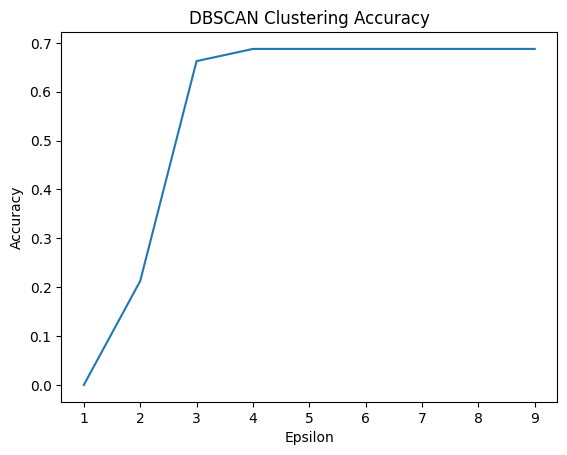

Best epsilon value: 4
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0]
Training 

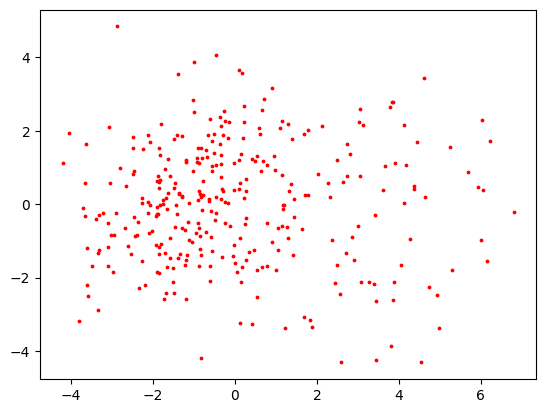

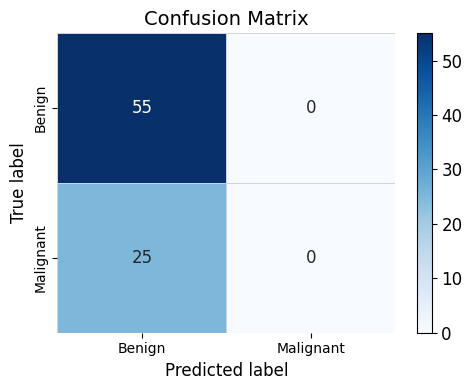

In [30]:
#DBSCAN
from sklearn.cluster import DBSCAN

def dbscan(X_train, X_test, y_train, y_test):
    acc = []
    for i in range(1, 10):
        # Create a DBSCAN clustering model
        dbscan = DBSCAN(eps=i, min_samples=2)

        # Fit the model to the training data
        dbscan.fit(X_train)

        # Get labels for each point in training data
        y_predict = np.array(dbscan.labels_)

        # Flip the 0s to 1s and vice versa
        y_predict_flipped = np.where((y_predict == 0) | (y_predict == 1), y_predict ^ 1, y_predict)

        # Test the model on the test data
        y_predict_test = DBSCAN.fit_predict(dbscan, X_test)

        # Flip the 0s to 1s and vice versa
        y_predict_test_flipped = np.where((y_predict_test == 0) | (y_predict_test == 1), y_predict_test ^ 1, y_predict_test)

        # Evaluate the performance of the model on both training and testing data
        train_acc = max(accuracy_score(y_train, y_predict), accuracy_score(y_train, y_predict_flipped))
        test_acc = max(accuracy_score(y_test, y_predict_test), accuracy_score(y_test, y_predict_test_flipped))

        acc.append(test_acc)

    # Plot the accuracy for different values of epsilon
    plt.plot(range(1, 10), acc)
    plt.xlabel('Epsilon')
    plt.ylabel('Accuracy')
    plt.title('DBSCAN Clustering Accuracy')
    plt.show()

    # Return the best epsilon value
    return np.argmax(acc) + 1

best_eps = dbscan(X_train, X_test, y_train, y_test)
print(f'Best epsilon value: {best_eps}')

# Create a DBSCAN clustering model with the best epsilon value
dbscan = DBSCAN(eps=best_eps, min_samples=2)

# Fit the model to the training data
dbscan.fit(X_train)

# Get labels for each point in training data
y_predict = np.array(dbscan.labels_)
print(y_predict)

# Flip the 0s to 1s and vice versa
y_predict_flipped = np.where((y_predict == 0) | (y_predict == 1), y_predict ^ 1, y_predict)

# Test the model on the test data
y_predict_test = DBSCAN.fit_predict(dbscan, X_test)

# Flip the 0s to 1s and vice versa
y_predict_test_flipped = np.where((y_predict_test == 0) | (y_predict_test == 1), y_predict_test ^ 1, y_predict_test)

# Evaluate the performance of the model on both training and testing data
train_acc = max(accuracy_score(y_train, y_predict), accuracy_score(y_train, y_predict_flipped))
test_acc = max(accuracy_score(y_test, y_predict_test), accuracy_score(y_test, y_predict_test_flipped))

print("Training Accuracy: ", "{:.4f}".format(train_acc * 100), "%")
print("Testing Accuracy: ", "{:.4f}".format(test_acc * 100), "%")

# Reduce training data to 2 features using PCA to plot results
pca = PCA(n_components=2)

X_train_plt = pca.fit_transform(X_train)

dbscan_plt = DBSCAN(eps=best_eps, min_samples=2).fit(X_train_plt)

# Generate a scatter plot graph for 2 clusters and their centers
plt.scatter(X_train_plt[:, 0][dbscan_plt.labels_ == 0], X_train_plt[:, 1][dbscan_plt.labels_ == 0], s=3, c='r')
plt.scatter(X_train_plt[:, 0][dbscan_plt.labels_ == 1], X_train_plt[:, 1][dbscan_plt.labels_ == 1], s=3, c='b')
plt.show()

# Convert class labels from integer to string format
y_true_str = ["Benign" if label == 0 else "Malignant" for label in y_test]
if accuracy_score(y_test, y_predict_test) > accuracy_score(y_test, y_predict_test_flipped):
    y_pred_str = ["Benign" if label == 0 else "Malignant" for label in y_predict_test]
else:
    y_pred_str = ["Benign" if label == 0 else "Malignant" for label in y_predict_test_flipped]

# Generate a confusion matrix plot
cm = confusion_matrix(y_true_str, y_pred_str, labels=["Benign", "Malignant"])
cm_labels = {"Benign": "Benign", "Malignant": "Malignant"}
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=cm_labels.values(), yticklabels=cm_labels.values(),
            cbar=False, annot_kws={"fontsize": 12}, linewidths=.5, linecolor='lightgray')
cbar = ax.figure.colorbar(ax.collections[0])
cbar.ax.tick_params(labelsize=12)
plt.title('Confusion Matrix', fontsize=14)
plt.xlabel('Predicted label', fontsize=12)
plt.ylabel('True label', fontsize=12)
plt.tight_layout()
plt.show()







### Hierarchial Clustering

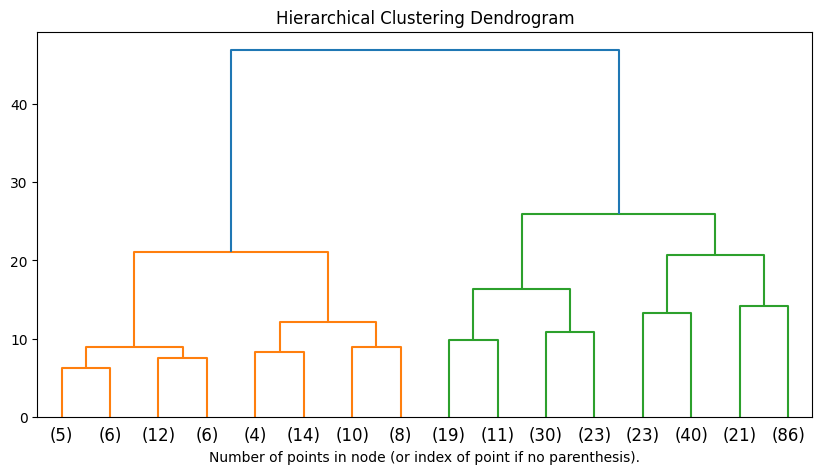

[1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0
 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1
 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0]
Training Accuracy:  93.0818 %
Testing Accuracy:  92.5000 %


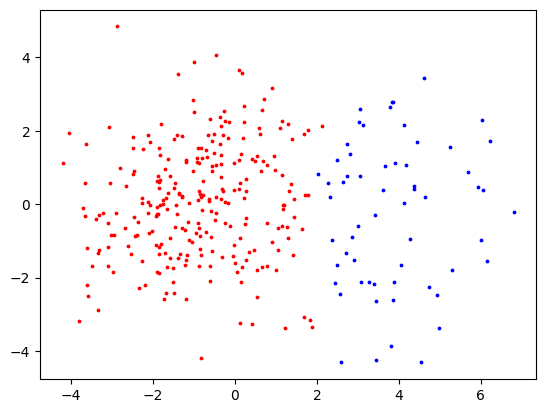

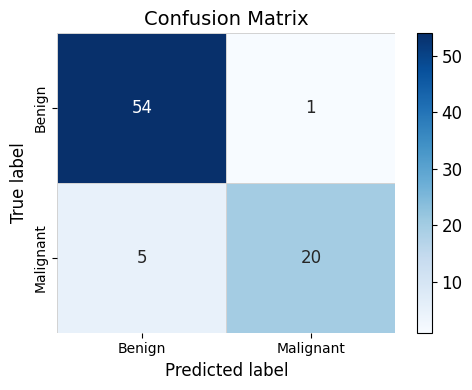

In [31]:
#dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

# Create a hierarchical clustering model
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

# Fit the model to the data
model = model.fit(X_train)

# Plot the dendrogram
plt.figure(figsize=(10, 5))
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

# Create a hierarchical clustering model with 2 clusters
model = AgglomerativeClustering(n_clusters=2)

# Fit the model to the data
model = model.fit(X_train)

# Get labels for each point in training data
y_predict = np.array(model.labels_)
print(y_predict)

# Flip the 0s to 1s and vice versa
y_predict_flipped = np.where((y_predict == 0) | (y_predict == 1), y_predict ^ 1, y_predict)

# Test the model on the test data
y_predict_test = AgglomerativeClustering.fit_predict(model, X_test)

# Flip the 0s to 1s and vice versa
y_predict_test_flipped = np.where((y_predict_test == 0) | (y_predict_test == 1), y_predict_test ^ 1, y_predict_test)

# Evaluate the performance of the model on both training and testing data
train_acc = max(accuracy_score(y_train, y_predict), accuracy_score(y_train, y_predict_flipped))
test_acc = max(accuracy_score(y_test, y_predict_test), accuracy_score(y_test, y_predict_test_flipped))

print("Training Accuracy: ", "{:.4f}".format(train_acc * 100), "%")
print("Testing Accuracy: ", "{:.4f}".format(test_acc * 100), "%")

# Reduce training data to 2 features using PCA to plot results
pca = PCA(n_components=2)

X_train_plt = pca.fit_transform(X_train)

model_plt = AgglomerativeClustering(n_clusters=2).fit(X_train_plt)

# Generate a scatter plot graph for 2 clusters and their centers
plt.scatter(X_train_plt[:, 0][model_plt.labels_ == 0], X_train_plt[:, 1][model_plt.labels_ == 0], s=3, c='r')
plt.scatter(X_train_plt[:, 0][model_plt.labels_ == 1], X_train_plt[:, 1][model_plt.labels_ == 1], s=3, c='b')
plt.show()

# Convert class labels from integer to string format
y_true_str = ["Benign" if label == 0 else "Malignant" for label in y_test]
if accuracy_score(y_test, y_predict_test) > accuracy_score(y_test, y_predict_test_flipped):
    y_pred_str = ["Benign" if label == 0 else "Malignant" for label in y_predict_test]
else:
    y_pred_str = ["Benign" if label == 0 else "Malignant" for label in y_predict_test_flipped]

# Generate a confusion matrix plot
cm = confusion_matrix(y_true_str, y_pred_str, labels=["Benign", "Malignant"])
cm_labels = {"Benign": "Benign", "Malignant": "Malignant"}
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=cm_labels.values(), yticklabels=cm_labels.values(),
            cbar=False, annot_kws={"fontsize": 12}, linewidths=.5, linecolor='lightgray')
cbar = ax.figure.colorbar(ax.collections[0])
cbar.ax.tick_params(labelsize=12)
plt.title('Confusion Matrix', fontsize=14)
plt.xlabel('Predicted label', fontsize=12)
plt.ylabel('True label', fontsize=12)
plt.tight_layout()
plt.show()






